## Show the propagator from the calculated correlator.

In [1]:
import numpy as np
from pathlib import Path
from pyrecon.metrics import MeshFFTCorrelator, MeshFFTPropagator, CatalogMesh 
import matplotlib.pyplot as plt

## For the IC with particles regularly spaced, there should be no shot noise

In [2]:
def read_correlator(data_dir, filename, bias):
    data_fn = Path(data_dir, filename)
    print("Read file:", data_fn)
    correlator = MeshFFTCorrelator.load(data_fn)  
    correlator.source_auto_initial.poles.shotnoise_nonorm = 0.  # <= setting shotnoise to 0
    propagator = correlator.to_propagator(growth=bias)
    transfer = correlator.to_transfer(growth=bias)
    return correlator, transfer, propagator

In [3]:
cap = 'sgc'
zmin, zmax = 0.6, 0.8
#Nmesh = 512
Nmesh = 1024
##recon_algo = "IterativeFFT"  or "MultiGrid"
recon_algo = "MultiGrid"
convention_list = ['reciso', 'recsym']
line_type_list = ['-', '--']
smooth_radius = 7.5
niter = 3
growth_rate = 0.816
bias = 2.35

In [4]:
data_dir = "/global/cfs/cdirs/desi/users/jerryou/MockChallenge/y1_mockchallenge/reconstruction/AbacusSummit_base_c000_ph000/cutsky/LRG/correlator/new_IC/"
filename_prerecon = f"correlator_LRG_c000_ph000_{cap.upper()}_{zmin}z{zmax}_Pre_recon_randoms20X_smooth{smooth_radius}_f{growth_rate:.3f}_b{bias:.2f}_nmesh{Nmesh}.npy"

In [5]:
correlator_pre, transfer_pre, propagator_pre = read_correlator(data_dir, filename_prerecon, 2.0)

Read file: /global/cfs/cdirs/desi/users/jerryou/MockChallenge/y1_mockchallenge/reconstruction/AbacusSummit_base_c000_ph000/cutsky/LRG/correlator/new_IC/correlator_LRG_c000_ph000_SGC_0.6z0.8_Pre_recon_randoms20X_smooth7.5_f0.816_b2.35_nmesh1024.npy


In [6]:
print(propagator_pre.muavg, propagator_pre.muavg.shape)

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975] (20,)


In [7]:
k = correlator_pre(mu=0.0, return_k=True)[0]
k

array([0.01280064, 0.01772446, 0.02268537, 0.02765163, 0.03263238,
       0.03762644, 0.04261494, 0.04760423, 0.05258845, 0.05757851,
       0.0625688 , 0.0675557 , 0.0725432 , 0.07754794, 0.0825536 ,
       0.08754287, 0.09254333, 0.09754952, 0.10254719, 0.10754035,
       0.11253676, 0.11753686, 0.12254009, 0.12754097, 0.13253347,
       0.13752972, 0.1425341 , 0.1475289 , 0.1525252 , 0.15752828,
       0.16252806, 0.16752583, 0.17252344, 0.17752814, 0.18252835,
       0.18751889, 0.19251975, 0.19752545, 0.20251973, 0.20751509,
       0.2125193 , 0.21751971, 0.22251679, 0.22751813, 0.23251853,
       0.23751685, 0.24251842, 0.24751985, 0.25251903, 0.25751655,
       0.26251314, 0.26751255, 0.27251416, 0.27751373, 0.28251389,
       0.28751447, 0.29251472, 0.29751496, 0.30251417, 0.30751489,
       0.31251417, 0.31751288, 0.3225142 , 0.32751315, 0.33251255,
       0.33751439, 0.3425145 , 0.34751404, 0.35251316, 0.35751192,
       0.3625109 , 0.36751191, 0.37251148, 0.37750893, 0.38250

In [8]:
kmask = ~np.isnan(k)
k = k[kmask]
k

array([0.01280064, 0.01772446, 0.02268537, 0.02765163, 0.03263238,
       0.03762644, 0.04261494, 0.04760423, 0.05258845, 0.05757851,
       0.0625688 , 0.0675557 , 0.0725432 , 0.07754794, 0.0825536 ,
       0.08754287, 0.09254333, 0.09754952, 0.10254719, 0.10754035,
       0.11253676, 0.11753686, 0.12254009, 0.12754097, 0.13253347,
       0.13752972, 0.1425341 , 0.1475289 , 0.1525252 , 0.15752828,
       0.16252806, 0.16752583, 0.17252344, 0.17752814, 0.18252835,
       0.18751889, 0.19251975, 0.19752545, 0.20251973, 0.20751509,
       0.2125193 , 0.21751971, 0.22251679, 0.22751813, 0.23251853,
       0.23751685, 0.24251842, 0.24751985, 0.25251903, 0.25751655,
       0.26251314, 0.26751255, 0.27251416, 0.27751373, 0.28251389,
       0.28751447, 0.29251472, 0.29751496, 0.30251417, 0.30751489,
       0.31251417, 0.31751288, 0.3225142 , 0.32751315, 0.33251255,
       0.33751439, 0.3425145 , 0.34751404, 0.35251316, 0.35751192,
       0.3625109 , 0.36751191, 0.37251148, 0.37750893, 0.38250

In [9]:
mu_id_list = [0, 10, 19]

In [10]:
correlator_pre(k=k, mu=0.975)

array([0.99327137, 1.0154971 , 1.01078834, 0.99039561, 0.98489182,
       0.98634655, 0.97911836, 0.96950733, 0.96718799, 0.95214167,
       0.9394684 , 0.92564663, 0.91484556, 0.91087562, 0.90556753,
       0.88273105, 0.85220643, 0.83001098, 0.80313784, 0.7778614 ,
       0.758763  , 0.74540301, 0.73336626, 0.73395291, 0.72631721,
       0.69152515, 0.66159979, 0.64293487, 0.6133552 , 0.56450881,
       0.53534823, 0.5126746 , 0.51162437, 0.49677936, 0.47603546,
       0.46673186, 0.44943978, 0.42564086, 0.3950751 , 0.38739443,
       0.36308252, 0.33099903, 0.3053871 , 0.28946134, 0.29161463,
       0.29349158, 0.28020046, 0.25941328, 0.22802984, 0.20463066,
       0.20115954, 0.18699002, 0.16809119, 0.17365563, 0.17234426,
       0.15101709, 0.14835065, 0.15757016, 0.14172183, 0.11534867,
       0.10160598, 0.09570728, 0.09807161, 0.10177886, 0.09699021,
       0.08815094, 0.0740238 , 0.06645053, 0.07191335, 0.07562176,
       0.0779513 , 0.06768856, 0.06120452, 0.0549263 , 0.04562

Read file: /global/cfs/cdirs/desi/users/jerryou/MockChallenge/y1_mockchallenge/reconstruction/AbacusSummit_base_c000_ph000/cutsky/LRG/correlator/new_IC/correlator_LRG_c000_ph000_SGC_0.6z0.8_shift_MultiGrid_randoms20X_reso7.8_smooth7.5_pad1.5_reciso_f0.816_b2.35_nmesh1024.npy
Read file: /global/cfs/cdirs/desi/users/jerryou/MockChallenge/y1_mockchallenge/reconstruction/AbacusSummit_base_c000_ph000/cutsky/LRG/correlator/new_IC/correlator_LRG_c000_ph000_SGC_0.6z0.8_shift_MultiGrid_randoms20X_reso7.8_smooth7.5_pad1.5_recsym_f0.816_b2.35_nmesh1024.npy


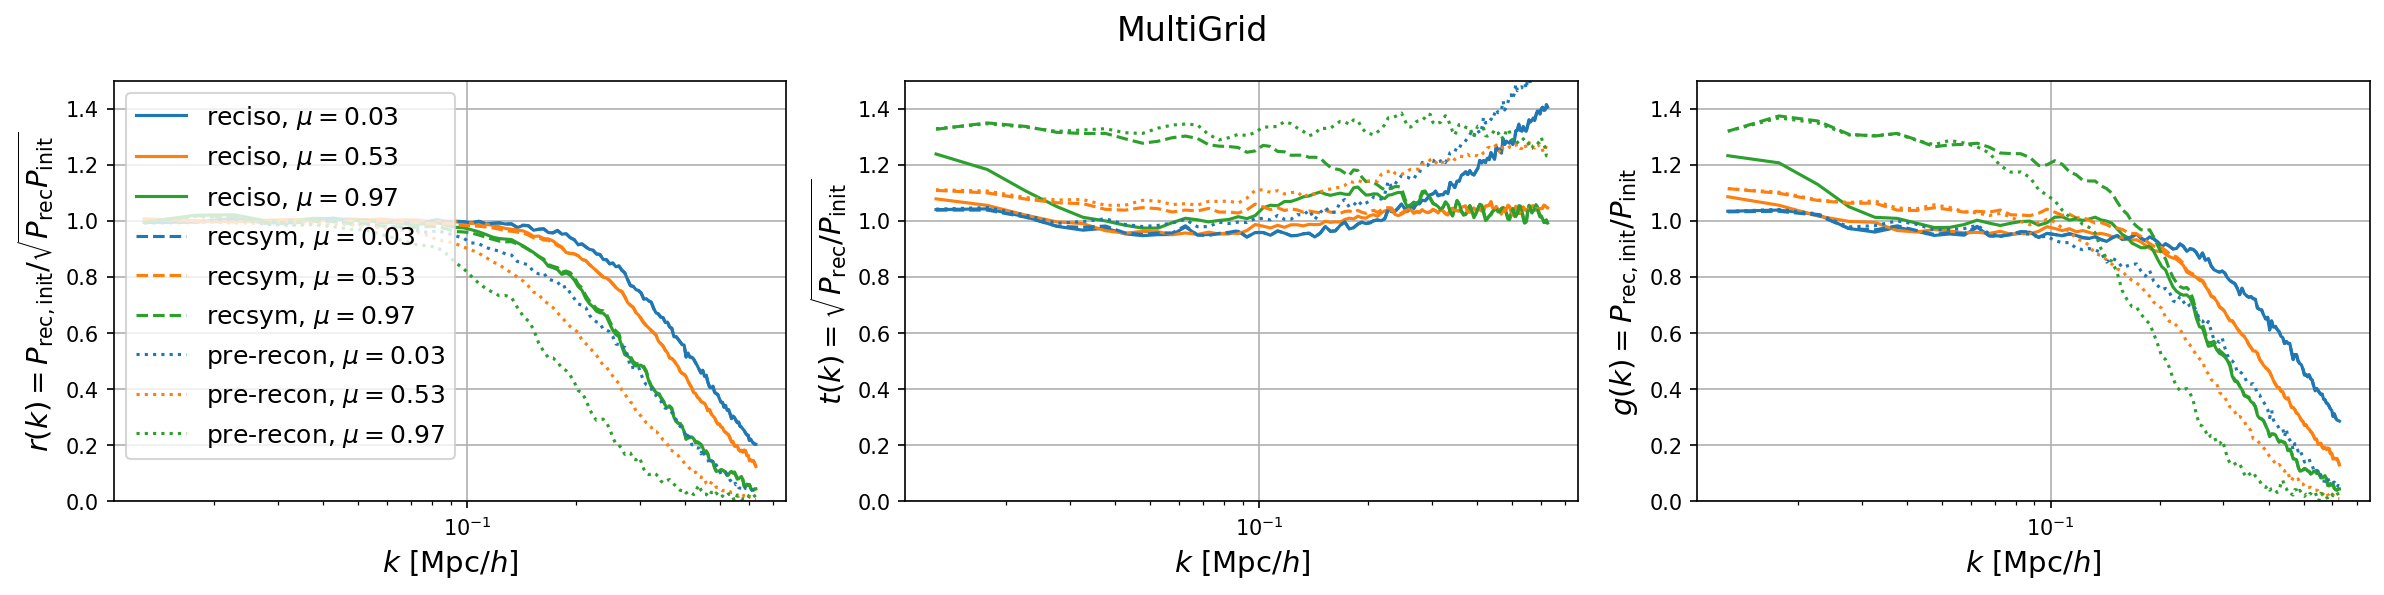

In [11]:
fig, lax = plt.subplots(nrows=1, ncols=3, figsize=(16,4), dpi=150)
fig.subplots_adjust(wspace=0.3)
lax = lax.flatten()
for i, convention in enumerate(convention_list[0:2]):
    if recon_algo == "MultiGrid":
        fname_appendix = f"{cap.upper()}_{zmin}z{zmax}_shift_{recon_algo}_randoms20X_reso7.8_smooth{smooth_radius}_pad1.5_{convention}_f{growth_rate:.3f}_b{bias:.2f}"
    else:
        fname_appendix = f"{cap.upper()}_{zmin}z{zmax}_shift_{recon_algo}_randoms20X_reso7.8_smooth{smooth_radius}_pad1.5_niter{niter}_{convention}_f{growth_rate:.3f}_b{bias:.2f}"
    filename = f"correlator_LRG_c000_ph000_{fname_appendix}_nmesh{Nmesh}.npy"
    correlator, transfer, propagator = read_correlator(data_dir, filename, 2.0)
    
    for imu, mu in enumerate(propagator.muavg[mu_id_list]):
        lax[0].plot(k, correlator(k=k, mu=mu), color=f'C{imu}', ls=line_type_list[i], label=r'{0}, $\mu = {1:.2f}$'.format(convention, mu))
        lax[1].plot(k, transfer(k=k, mu=mu), color=f'C{imu}', ls=line_type_list[i])
        lax[2].plot(k, propagator(k=k, mu=mu), color=f'C{imu}', ls=line_type_list[i])
        
# plot pre-recon result
for imu, mu in enumerate(np.abs(propagator.muavg[mu_id_list])):
    #print("mu:", mu, transfer_pre(k=k, mu=mu))
    lax[0].plot(k, correlator_pre(k=k, mu=mu), color=f'C{imu}', ls=":", label=r'{0}, $\mu = {1:.2f}$'.format("pre-recon", mu))
    lax[1].plot(k, transfer_pre(k=k, mu=mu), color=f'C{imu}', ls=":")
    lax[2].plot(k, propagator_pre(k=k, mu=mu), color=f'C{imu}', ls=":")
        
for ax in lax:
    #ax.legend(fontsize=14)
    ax.grid(True)
    ax.set_xscale("log")
    ax.set_ylim([0., 1.5])
    ax.set_xlabel(r'$k$ [$\mathrm{Mpc}/h$]', fontsize=14)
    
lax[0].legend(fontsize=12)
lax[0].set_ylabel(r'$r(k) = P_{\mathrm{rec},\mathrm{init}}/\sqrt{P_{\mathrm{rec}}P_{\mathrm{init}}}$', fontsize=14)
lax[1].set_ylabel(r'$t(k) = \sqrt{P_{\mathrm{rec}}/P_{\mathrm{init}}}$', fontsize=14)
lax[2].set_ylabel(r'$g(k) = P_{\mathrm{rec},\mathrm{init}}/P_{\mathrm{init}}$', fontsize=14)
plt.suptitle(recon_algo, fontsize=16)
plt.tight_layout()
# ofile = f"figs/propagator/{rec_method}_BGS_propagator_z0.2_nmesh512_Rs15.0_bias1.63.png"
# plt.savefig(ofile)